In [2]:
from sklearn.preprocessing import OneHotEncoder
import pickle
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np

with open("embeddings.pkl", "rb") as f:
  vocab_list,embeddings_list, vocab2idx = pickle.load(f)
  embeddings_array = np.array([[0]*300]+embeddings_list)
    
with open("x.pkl", "rb") as f:
  X, y = pickle.load(f)

ohe = OneHotEncoder(sparse= False)
y_ = ohe.fit_transform(y.reshape(-1,1))
X_train, X_test, y_train, y_test = train_test_split(X, y_, test_size=0.2, random_state=42)

In [3]:
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

def create_model(lstm_dim, dropout, bidirectional, learning_rate):
    
  model = Sequential()
  model.add(Embedding(input_dim=embeddings_array.shape[0], output_dim=embeddings_array.shape[1],input_length=X.shape[1], weights=[embeddings_array], mask_zero=True))
  if dropout:
    model.add(Dropout(dropout))
  lstm = LSTM(lstm_dim)
  if bidirectional:
    lstm = Bidirectional(lstm)
  model.add(lstm)
  model.add(Dense(3, activation="softmax"))
  opt = Adam(learning_rate=learning_rate)
  model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
  return model

In [ ]:
model = create_model(50, 0.2, False, 0.0001)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=64)

In [7]:
from matplotlib import pyplot as plt
plt.plot(history.history["accuracy"], label="training accuracy")
plt.plot(history.history["val_accuracy"], label="validation accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.savefig("trainingvsvalidation.png", dpi=300)

In [8]:
y_pred = model.predict(X_test)

In [9]:
from sklearn.metrics import classification_report
print(classification_report(ohe.inverse_transform(y_test), ohe.inverse_transform(y_pred)))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      3659
           1       0.78      0.73      0.75      2803
           2       0.71      0.74      0.72      2394

    accuracy                           0.80      8856
   macro avg       0.79      0.79      0.79      8856
weighted avg       0.80      0.80      0.80      8856



In [10]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ohe.inverse_transform(y_test), ohe.inverse_transform(y_pred)))

[[3306  155  198]
 [ 235 2041  527]
 [ 195  426 1773]]


In [11]:
model.evaluate(X_test, y_test)

277/277 [==============================] - 9s 33ms/step - loss: 0.5235 - accuracy: 0.8040


[0.5235124826431274, 0.8039746880531311]

In [12]:
history2 = model.fit(X_train, y_train, epochs=5, validation_split=0.2, batch_size=64)

Epoch 1/5
443/443 [==============================] - 142s 321ms/step - loss: 0.2555 - accuracy: 0.9069 - val_loss: 0.5487 - val_accuracy: 0.8027
Epoch 2/5
443/443 [==============================] - 141s 319ms/step - loss: 0.2400 - accuracy: 0.9122 - val_loss: 0.5714 - val_accuracy: 0.7941
Epoch 3/5
443/443 [==============================] - 143s 322ms/step - loss: 0.2279 - accuracy: 0.9175 - val_loss: 0.5652 - val_accuracy: 0.7969
Epoch 4/5
443/443 [==============================] - 139s 315ms/step - loss: 0.2162 - accuracy: 0.9217 - val_loss: 0.5846 - val_accuracy: 0.7963
Epoch 5/5
443/443 [==============================] - 140s 317ms/step - loss: 0.2038 - accuracy: 0.9266 - val_loss: 0.5848 - val_accuracy: 0.7968


In [13]:
model.evaluate(X_test, y_test)

277/277 [==============================] - 9s 34ms/step - loss: 0.5801 - accuracy: 0.7987


[0.580106794834137, 0.7986675500869751]

In [4]:
first_model = create_model(100, 0, True, 0.01)
first_history = first_model.fit(X_train, y_train, epochs=5, validation_split=0.2, batch_size=32)

Epoch 1/5
886/886 [==============================] - 399s 451ms/step - loss: 0.6128 - accuracy: 0.7345 - val_loss: 0.5697 - val_accuracy: 0.7704
Epoch 2/5
886/886 [==============================] - 406s 459ms/step - loss: 0.4349 - accuracy: 0.8227 - val_loss: 0.5852 - val_accuracy: 0.7726
Epoch 3/5
886/886 [==============================] - 400s 451ms/step - loss: 0.3798 - accuracy: 0.8481 - val_loss: 0.6518 - val_accuracy: 0.7519
Epoch 4/5
886/886 [==============================] - 410s 463ms/step - loss: 0.3522 - accuracy: 0.8579 - val_loss: 0.6922 - val_accuracy: 0.7393
Epoch 5/5
886/886 [==============================] - 419s 473ms/step - loss: 0.3367 - accuracy: 0.8652 - val_loss: 0.7495 - val_accuracy: 0.7397


In [5]:
first_model.evaluate(X_test, y_test)

277/277 [==============================] - 23s 82ms/step - loss: 0.7260 - accuracy: 0.7486


[0.7260335683822632, 0.748645007610321]

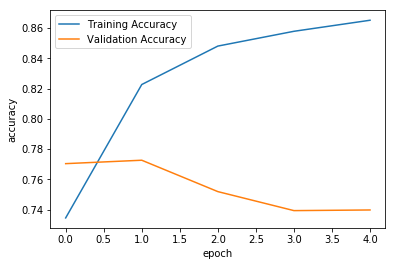

In [7]:
from matplotlib import pyplot as plt
plt.plot(first_history.history["accuracy"], label = "Training Accuracy")
plt.plot(first_history.history["val_accuracy"], label = "Validation Accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.savefig("firstmodeltraining.png", dpi=300)

In [10]:
first_y_pred = first_model.predict(X_test)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(ohe.inverse_transform(y_test), ohe.inverse_transform(first_y_pred)))
print(confusion_matrix(ohe.inverse_transform(y_test), ohe.inverse_transform(first_y_pred)))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      3659
           1       0.72      0.68      0.70      2803
           2       0.64      0.70      0.67      2394

    accuracy                           0.75      8856
   macro avg       0.74      0.74      0.74      8856
weighted avg       0.75      0.75      0.75      8856

[[3043  266  350]
 [ 286 1918  599]
 [ 232  493 1669]]


In [15]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
import pickle 

c = KerasClassifier(build_fn=create_model, verbose=100)

best_model = GridSearchCV(c, dict(
    epochs=[1, 2], 
    batch_size=[16,32,64],
    learning_rate=[0.01, 0.001, 0.0001],
    bidirectional = [False, True],
    dropout = [0, 0.2, 0.5],
    lstm_dim = [50, 75, 100]
), verbose=100, n_jobs=-1)

best_model.fit(X_train, y_train)

with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)



Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
Memmapping (shape=(44278, 286), dtype=float32) to new file /var/folders/rn/y51df8cj5mz1ks3mvtr5hxvm0000gn/T/joblib_memmapping_folder_11652_985977785/11652-5943812728-bb73b583af8a470da57d35dc7f53584c.pkl
Memmapping (shape=(29066, 300), dtype=float64) to new file /var/folders/rn/y51df8cj5mz1ks3mvtr5hxvm0000gn/T/joblib_memmapping_folder_11652_985977785/11652-5943812728-fe64a432f17a43b9a54962f22b197ed9.pkl
Memmapping (shape=(35422, 286), dtype=float32) to new file /var/folders/rn/y51df8cj5mz1ks3mvtr5hxvm0000gn/T/joblib_memmapping_folder_11652_985977785/11652-5943812728-8b56114a48434e20af857b6b48bb6af1.pkl
Pickling array (shape=(35422, 3), dtype=float64).
Pickling array (shape=(28337,), dtype=int64).
Pickling array (shape=(7085,), dtype=int64).
Memmapping (shape=(44278, 286), dtype=float32) to old file /var/folders/rn/y51df8cj5mz1ks3mvtr5hxvm0000gn/T/j

KeyboardInterrupt: 